# Предобработка на податоците вчитани од некое податочно множество

Ќе се работи со множеството кое содржи разни податоци за патниците на бродот Титаник. Ова множество се користи често како пример за работа со податоци. Во случајот е превземен само делот од множеството кој што служи за тренирање на алгоритмите за машинско учење

Овде ќе се направи вчитување на множеството, некои основни операции (бришење на колони, промена на индекс, отстранување на редови во кои недостасуваат записи) и краток пример за работа со текстуални податоци

In [1]:
import pandas as pd

podatoci = pd.read_csv('../Exercises/Glava 5 - Podatochni mnozhestva/titanic.csv')
podatoci.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
podatoci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
podatoci.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Fare'>

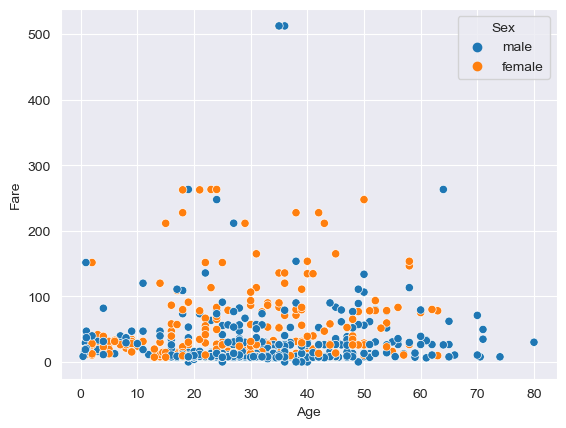

In [8]:
import seaborn as sns

sns.scatterplot(data=podatoci, x='Age', y='Fare', hue='Sex')

In [10]:
SmalenoMnozhestvo = podatoci.drop(labels=['SibSp', 'Parch', 'Fare',
                                          'Ticket', 'Cabin', 'Name'],
                                  axis=1)
SmalenoMnozhestvo.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S


In [13]:
print(SmalenoMnozhestvo['PassengerId'].is_unique)
SmalenoMnozhestvo = SmalenoMnozhestvo.set_index('PassengerId')
SmalenoMnozhestvo.head()

True


,Survived,Pclass,Sex,Age,Embarked
PassengerId,,,,,
1,0,3,male,22.0,S
2,1,1,female,38.0,C
3,1,3,female,26.0,S
4,1,1,female,35.0,S
5,0,3,male,35.0,S


In [15]:
Maska = SmalenoMnozhestvo.Survived.notnull()
NeNuli = SmalenoMnozhestvo[Maska]
print(NeNuli)

             Survived  Pclass     Sex   Age Embarked
PassengerId                                         
1                   0       3    male  22.0        S
2                   1       1  female  38.0        C
3                   1       3  female  26.0        S
4                   1       1  female  35.0        S
5                   0       3    male  35.0        S
...               ...     ...     ...   ...      ...
887                 0       2    male  27.0        S
888                 1       1  female  19.0        S
889                 0       3  female   NaN        S
890                 1       1    male  26.0        C
891                 0       3    male  32.0        Q

[891 rows x 5 columns]


In [16]:
SiteIzbrishani = SmalenoMnozhestvo.dropna()
SiteIzbrishani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   Embarked  712 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 33.4+ KB


In [17]:
NekoiIzbrishani = SmalenoMnozhestvo.dropna(subset=['Age'])
NekoiIzbrishani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  712 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 33.5+ KB


In [18]:
SmalenoMnozhestvo.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [19]:
KolonaSoNula = SmalenoMnozhestvo['Survived'].fillna(0)
KolonaSoNula

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [20]:
Gospogjici = podatoci[podatoci['Name'].str.contains('Miss')]
Gospogjici.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
